<a href="https://colab.research.google.com/github/Prakharprasun/MLPP1/blob/main/MLPP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# prompt: import all important lib for machine learning

# Import libraries for data analysis and manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Import libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Import library for cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# Import library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import library for feature engineering
from sklearn.feature_selection import SelectKBest, chi2

# Import library for dimensionality reduction
from sklearn.decomposition import PCA

# Import library for pipeline
from sklearn.pipeline import Pipeline


In [122]:
!pip install quandl
import quandl

In [123]:
data= quandl.get("NSE/TATAGLOBAL")

In [124]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


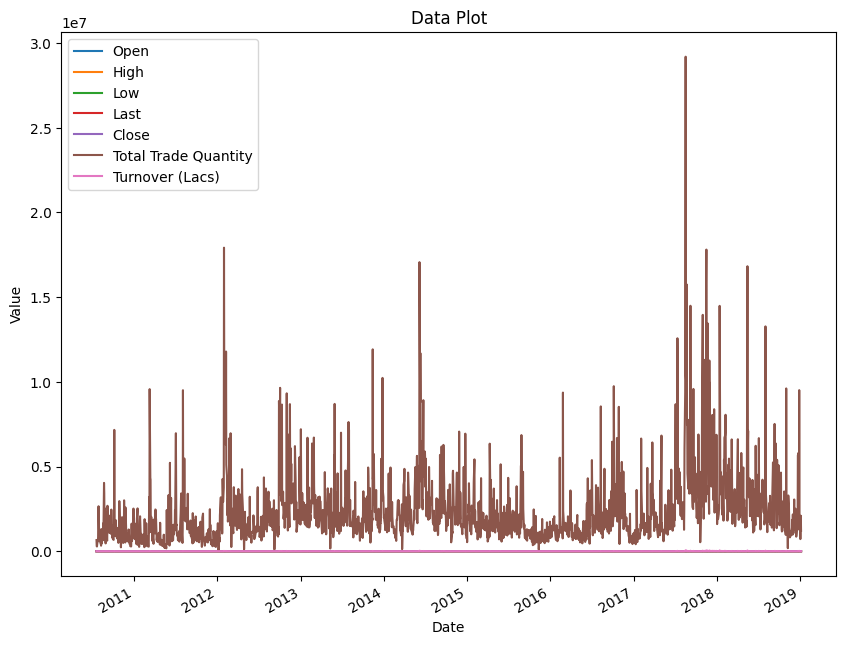

In [125]:
data.plot(figsize=(10, 8))
plt.title("Data Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [126]:
data['open-close']= data['Open'] - data['Close']
data['high-low']= data['High'] - data['Low']
data.dropna()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),open-close,high-low
Date,,,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56,0.55,1.95
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17,-0.60,1.75
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31,1.15,1.70
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01,2.50,3.90
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98,-1.05,7.50
...,...,...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09,2.60,4.80
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63,0.85,3.00
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31,4.40,6.75


In [127]:
X = data[['open-close', 'high-low']]
y = data[['Close']]
y=y.to_numpy().flatten()

X

,open-close,high-low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50
...,...,...
2018-12-31,2.60,4.80
2019-01-01,0.85,3.00
2019-01-02,4.40,6.75


In [128]:
import pandas as pd

print(X.head())
print(X.isnull().sum())

            open-close  high-low
Date                            
2010-07-21        0.55      1.95
2010-07-22       -0.60      1.75
2010-07-23        1.15      1.70
2010-07-26        2.50      3.90
2010-07-27       -1.05      7.50
open-close    0
high-low      0
dtype: int64


In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
try:
    le.fit(y)
    print("y is a supported data type for classification.")
except ValueError:
    print("y is not a supported data type for classification.")
if not le.fit(y):
    y = le.fit_transform(y)

y is a supported data type for classification.


In [130]:
print(np.any(np.array(y) % 1 != 0))
y = y.astype(int)

True


In [131]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [132]:
predicted_values = clf.predict(X)
predicted_values

array([ 90,  90,  90, ..., 159, 141, 141])

In [133]:
p = [[4, 4]]
clf.predict(p)
clf.predict_proba(p)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([[8.18156706e-04, 1.74474738e-03, 3.72860255e-03, 2.12845788e-03,
        2.25894933e-03, 4.11277819e-03, 5.40873914e-03, 7.58096641e-03,
        8.29473817e-03, 4.95550986e-03, 6.55233017e-03, 6.22202006e-03,
        8.69733809e-03, 9.60234536e-03, 6.03337631e-03, 5.10603531e-03,
        7.32794808e-03, 9.77395600e-03, 5.00701381e-03, 5.00449074e-03,
        5.90251882e-03, 4.73055582e-03, 6.32027185e-03, 6.61945210e-03,
        7.89133471e-03, 5.75548800e-03, 8.75876526e-03, 8.16190739e-03,
        5.37118577e-03, 7.73989489e-03, 3.88131549e-03, 3.50146848e-03,
        1.07804736e-02, 3.15111978e-03, 8.29991698e-03, 1.38493207e-02,
        1.37108838e-02, 1.55772767e-02, 1.90989127e-02, 1.49301258e-02,
        2.08065421e-02, 1.71275169e-02, 7.89320406e-03, 1.66893499e-02,
        1.60565373e-02, 1.32833005e-02, 5.49398309e-03, 1.49255842e-02,
        1.44954018e-02, 8.92469630e-03, 1.06761851e-02, 1.49990190e-02,
        1.36006553e-02, 1.99622251e-02, 1.67203948e-02, 9.839725

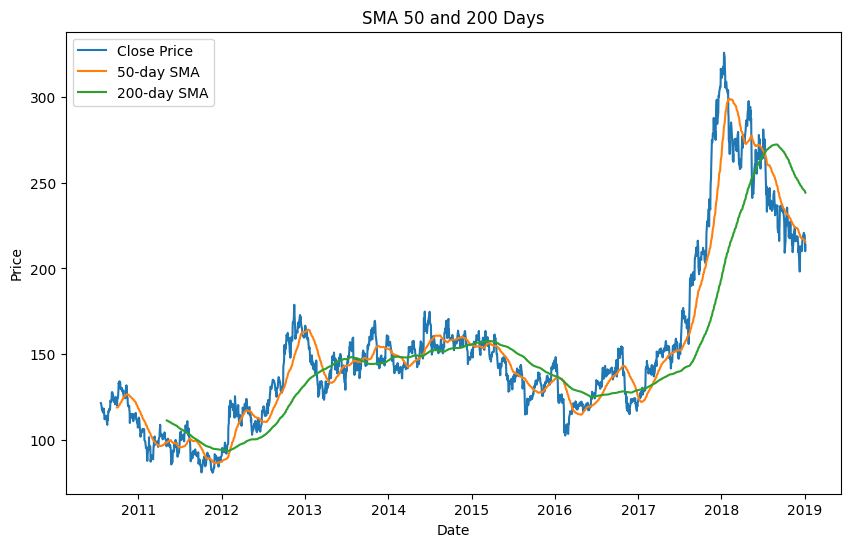

In [134]:
import matplotlib.pyplot as plt
sma_50 = data['Close'].rolling(window=50).mean()
sma_200 = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(sma_50, label='50-day SMA')
plt.plot(sma_200, label='200-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SMA 50 and 200 Days')
plt.legend()
plt.show()